In [1]:
using Revise
using Pkg
Pkg.activate("LennardJones")

using LennardJones

using Plots

  Activating project at `~/Julia/Lennard-Jones/LennardJones`


### 希ガス分子に対するLennard-Jones パラメータ

|  | $\sigma$[nm] | $\epsilon$[J] | $\epsilon/k_{B}$[K] | m [kg] |
|:---:|:---:|:---:|:---:| :---:|
| Ne | 0.274 | $0.50 \times 10^{-21}$ | 36.2 |  
| Ar | 0.340 | $1.67 \times 10^{-21}$ | 121 |$6.634 \times 10^{-26}$|   
| Kr | 0.365 | $2.25 \times 10^{-21}$ | 163 |
| Xe | 0.398 | $3.20 \times 10^{-21}$ | 232 |  

### Argonの場合

In [2]:
ϵ = 1.67
σ = 0.34
m = 6.63e-3

f_ar(r) = LennardJones.force(r,ϵ,σ)

f_ar (generic function with 1 method)

┌ Info: Saved animation to /Users/hitoshi/Julia/Lennard-Jones/triangle_lattice2.gif
└ @ Plots /Users/hitoshi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/hitoshi/Julia/Lennard-Jones/triangle_lattice2.gif")
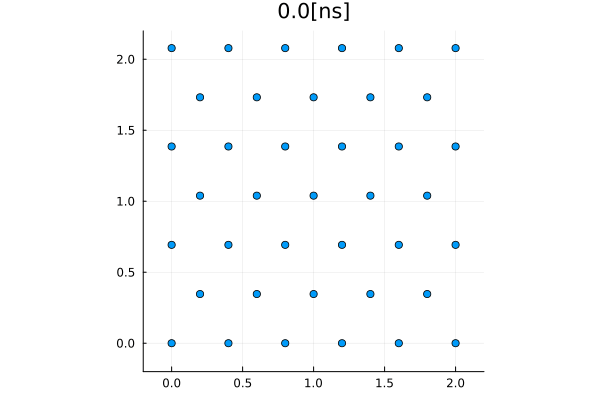

In [4]:
la = 0.4 # 格子定数
row = 4
col = 6
as = vec([Atom([x,y],[0.0,0.0],m) for x=0.0:la:la*(col-1),y=0.0:la*√3:la*√3*(row-1)])
bs = vec([Atom([x,y],[0.0,0.0],m) for x=la/2:la:la*(col-1),y=la*√3/2:la*√3:la*√3*(row-1)])
append!(as,bs)
Δt = 1e-6
n = 1e6
samp = 1000

anim = Animation()
for i=0:n
    if i%samp == 0
        xs = [a.x[1] for a in as]
        ys = [a.x[2] for a in as]
        time = i/samp
        plt = plot(xs,ys,st=:scatter,xlims=(-0.2,2.2),ylims=(-0.2,2.2),label="",aspect_ratio=:equal,title="$time[ns]")
        frame(anim,plt)
    end
    accs = calc_acc(as,f_ar)
    update_x!(as,accs,Δt)
    acc_nexts = calc_acc(as,f_ar)
    update_v!(as,accs,acc_nexts,Δt)
end
gif(anim,"triangle_lattice2.gif",fps=30)
